In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [9]:
#parameters
nx = 41 #number of spatial discrete points
L = 2.0 #length of 1D domain
dx = L / (nx - 1) #spatial grid size
nt = 25 # number of timesteps
dt = 0.002 # time step size
c = 1.0 # convection speed

#grid point coordinate defition
x = numpy.linspace(0.0, L, num = nx)

In [10]:
#set initial condiditons
u0 = numpy.ones(nx)

#find list of indices where 0.5<x<=1.0
mask = numpy.where(numpy.logical_and(x>=0.5, x<= 1.0))
print(mask)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),)


In [11]:
#update initial conditions to make the square wave shape
#set u = 2.0 where 0.5<=x<=1.0
u0[mask] = 2.0
print(u0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


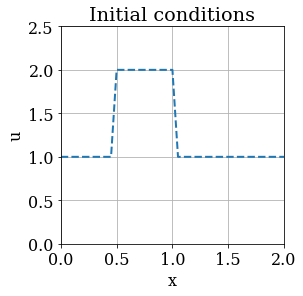

In [12]:
#plot the inital condiditons
pyplot.figure(figsize=(4.0, 4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color='C0', linestyle='--', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

In [13]:
#code for the discrete form of the convection equation, 
#and repeat the calculation for each timestep to see how far the wave travels

u = u0.copy()
for n in range(1, nt):
    un = u.copy()
    for i in range (1, nx):
        u[i] = un[i] - c *dt / dx * (un[i] - un[i - 1])

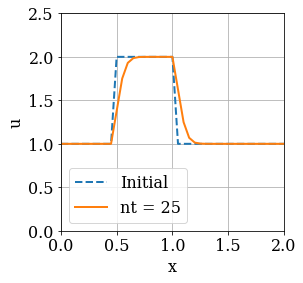

In [14]:
#plot the solution after nt timesteps
#along with the intial conditions!

pyplot.figure(figsize=(4.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

The shape of the square wave is disipating as it moves to the right. Decreasing the size of the time step allows for a slightly more square resultant wave, but it continues to deteriorate somewhat.

In [16]:
#non linear convection!

#parameters:
nx = 41 #number of spatial discrete points
L = 2.0 #length of 1D domain
dx = L/(nx - 1) #spatial grid size
nt = 10 #number of timesteps
dt = 0.02 #timestep size

x = numpy.linspace(0.0, L, num = nx)
u0 = numpy.ones(nx)
mask = numpy.where(numpy.logical_and(x>=0.5, x<=1.0))
u0[mask] = 2.0

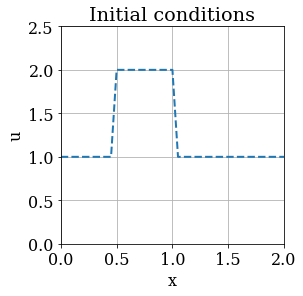

In [17]:
# Plot the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color='C0', linestyle='--', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

In [22]:
#to get the non linear solution you could write a function like:
#for n in range(1, nt):  
#  un = u.copy() 
#  for i in range(1, nx): 
#    u[i] = un[i] - un[i]*dt/dx*(un[i]-un[i-1])

#OR you could be fancy and use numpy functions like THIS:

u = u0.copy()
for n in range(1, nt):
    u[1:] = u[1:] - dt/dx * u[1:] *(u[1:] - u[:-1])

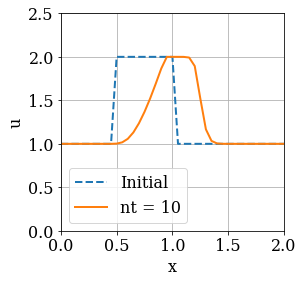

In [23]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);